In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import re
import warnings
warnings.filterwarnings('ignore')

# Import the data

In [2]:
cve = pd.read_csv('CVEs_2019_to_2022.csv')
cwe = pd.read_csv('CWE_definitions_all.csv')
cve.shape , cwe.shape

((81067, 17), (668, 8))

In [3]:
pd.concat([cve.head(2),cve.tail(2)])
cve.tail(2)

,Unnamed: 0.1,CVE ID,CWE ID,# of Exploits,Vulnerability Type(s),Publish Date,Update Date,Score,Gained Access Level,Access,Complexity,Authentication,Conf.,Integ.,Avail,Unnamed: 0,CVE Summary
81065,25225,CVE-2003-5002,319.0,NaN,NaN,2022-03-28,2022-04-06,5.0,None,Remote,Low,Not required,Partial,None,None,25225,** UNSUPPORTED WHEN ASSIGNED ** A vulnerabilit...
81066,25226,CVE-2003-5001,NaN,NaN,XSS,2022-03-28,2022-04-06,7.5,None,Remote,Low,Not required,Partial,Partial,Partial,25226,** UNSUPPORTED WHEN ASSIGNED ** A vulnerabilit...


In [4]:
pd.concat([cwe.head(2),cwe.tail(2)])

,Unnamed: 0,CWE Number,Name,Number Of Related Vulnerabilities,CWE Details,CWE Definition,Description,Background Details
0,0,79,Failure to Preserve Web Page Structure ('Cross...,22413.0,https://www.cvedetails.com/cwe-details/79,http://cwe.mitre.org/data/definitions/79,The software does not sufficiently valida...,The same origin policy states that browse...
1,1,119,Failure to Constrain Operations within the Bou...,11915.0,https://www.cvedetails.com/cwe-details/119,http://cwe.mitre.org/data/definitions/119,The software performs operations on a mem...,
666,666,92,DEPRECATED: Improper Sanitization of Custom Sp...,NaN,https://www.cvedetails.com/cwe-details/92,http://cwe.mitre.org/data/definitions/92,The software uses a custom or proprietary...,
667,667,97,Failure to Sanitize Server-Side Includes (SSI)...,NaN,https://www.cvedetails.com/cwe-details/97,http://cwe.mitre.org/data/definitions/97,The software fails to adequately filter s...,


In [5]:
cwe.loc[1][-1] , cwe.loc[666][3]

(' ', nan)

# CWE - Prepration

### Testing

In [6]:
cwe.shape

(668, 8)

In [7]:
cwe.head(3)

,Unnamed: 0,CWE Number,Name,Number Of Related Vulnerabilities,CWE Details,CWE Definition,Description,Background Details
0,0,79,Failure to Preserve Web Page Structure ('Cross...,22413.0,https://www.cvedetails.com/cwe-details/79,http://cwe.mitre.org/data/definitions/79,The software does not sufficiently valida...,The same origin policy states that browse...
1,1,119,Failure to Constrain Operations within the Bou...,11915.0,https://www.cvedetails.com/cwe-details/119,http://cwe.mitre.org/data/definitions/119,The software performs operations on a mem...,
2,2,89,Improper Sanitization of Special Elements used...,9554.0,https://www.cvedetails.com/cwe-details/89,http://cwe.mitre.org/data/definitions/89,The software constructs all or part of an...,


In [8]:
cwe1 = cwe.drop('Unnamed: 0',axis=1)
cwe1.shape

(668, 7)

In [9]:
cwe1.isna().sum()

CWE Number                             0
Name                                   0
Number Of Related Vulnerabilities    343
CWE Details                            0
CWE Definition                         0
Description                            0
Background Details                     0
dtype: int64

In [10]:
cwe1['Number Of Related Vulnerabilities'] = cwe1['Number Of Related Vulnerabilities'].fillna(0).astype('int64')
cwe1.isna().sum()

CWE Number                           0
Name                                 0
Number Of Related Vulnerabilities    0
CWE Details                          0
CWE Definition                       0
Description                          0
Background Details                   0
dtype: int64

In [11]:
cwe1.dtypes

CWE Number                            int64
Name                                 object
Number Of Related Vulnerabilities     int64
CWE Details                          object
CWE Definition                       object
Description                          object
Background Details                   object
dtype: object

In [12]:
print(cwe1.loc[0][-2]  ,'\n', cwe1.loc[0][-1])
print('\n', cwe1[cwe1['Background Details'] != ' '].shape)

     The software does not sufficiently validate, filter, escape,      and/or encode user-controllable input before it is placed in output that is used      as a web page that is served to other users.Cross-site scripting (XSS) vulnerabilities occur when:    
      The same origin policy states that browsers should limit the resources       accessible to scripts running on a given web site , or "origin", to the       resources associated with that web site on the client-side, and not the       client-side resources of any other sites or "origins". The goal is to       prevent one site from being able to modify or read the contents of an       unrelated site. Since the World Wide Web involves interactions between many       sites, this policy is important for browsers to enforce.   

 (37, 7)


In [13]:
cwe1[cwe.duplicated()]

,CWE Number,Name,Number Of Related Vulnerabilities,CWE Details,CWE Definition,Description,Background Details


### Clean code

In [14]:
cwe1 = cwe.drop('Unnamed: 0',axis=1)
cwe1['Number Of Related Vulnerabilities'] = cwe1['Number Of Related Vulnerabilities'].fillna(0).astype('int64')

In [15]:
cwe1.head(2)

,CWE Number,Name,Number Of Related Vulnerabilities,CWE Details,CWE Definition,Description,Background Details
0,79,Failure to Preserve Web Page Structure ('Cross...,22413,https://www.cvedetails.com/cwe-details/79,http://cwe.mitre.org/data/definitions/79,The software does not sufficiently valida...,The same origin policy states that browse...
1,119,Failure to Constrain Operations within the Bou...,11915,https://www.cvedetails.com/cwe-details/119,http://cwe.mitre.org/data/definitions/119,The software performs operations on a mem...,


# CVE - Preparation

### Testing

In [16]:
cve.shape

(81067, 17)

In [17]:
cve.head(3)

,Unnamed: 0.1,CVE ID,CWE ID,# of Exploits,Vulnerability Type(s),Publish Date,Update Date,Score,Gained Access Level,Access,Complexity,Authentication,Conf.,Integ.,Avail,Unnamed: 0,CVE Summary
0,0,CVE-2019-1020019,79.0,NaN,XSS,2019-07-29,2019-07-31,4.3,None,Remote,Medium,Not required,None,Partial,None,0,invenio-previewer before 1.0.0a12 allows XSS.
1,1,CVE-2019-1020018,287.0,NaN,NaN,2019-07-29,2022-04-18,7.5,None,Remote,Low,Not required,Partial,Partial,Partial,1,Discourse before 2.3.0 and 2.4.x before 2.4.0....
2,2,CVE-2019-1020017,NaN,NaN,NaN,2019-07-29,2023-03-03,5.0,None,Remote,Low,Not required,None,Partial,None,2,Discourse before 2.3.0 and 2.4.x before 2.4.0....


In [18]:
cve1 = cve.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
cve1.shape

(81067, 15)

In [19]:
cve1.isna().sum()

CVE ID                       0
CWE ID                   11693
# of Exploits            80997
Vulnerability Type(s)    33127
Publish Date                 0
Update Date                  0
Score                        0
Gained Access Level          0
Access                       0
Complexity                   0
Authentication               0
Conf.                        0
Integ.                       0
Avail                        0
CVE Summary                  0
dtype: int64

In [20]:
# CWE ID
cve1[~cve1['CWE ID'].isna()] # fillna 0 for each NaN in 'CWE ID' column
cve1['CWE ID'].nunique() # = 335
cve1[cve1['CWE ID'] == 0] # check if 0 is already in 'CWE ID' before fillna 
cve1['CWE ID'] = cve1['CWE ID'].fillna(0).astype('int64')

In [21]:
# # of Exploits
cve1[~cve1['# of Exploits'].isna()]
cve1['# of Exploits'].unique()
cve1['# of Exploits'] = cve1['# of Exploits'].fillna(0).astype('int64')

In [22]:
# Vulnerability Type(s)
cve1[cve1['Vulnerability Type(s)'].isna()]
cve1['Vulnerability Type(s)'].nunique()
cve1['Vulnerability Type(s)'] = cve1['Vulnerability Type(s)'].fillna('Unknown')

In [23]:
cve1[cve1.duplicated()]

,CVE ID,CWE ID,# of Exploits,Vulnerability Type(s),Publish Date,Update Date,Score,Gained Access Level,Access,Complexity,Authentication,Conf.,Integ.,Avail,CVE Summary


In [24]:
cols = ['Gained Access Level','Access','Complexity','Authentication','Conf.','Integ.','Avail']
for c in cols:
    cve1[c] = cve1[c].replace('???','Unknown')
    print(f'{c} : {cve1[c].nunique()} ==> {cve1[c].unique()} ; \n{cve1[c].value_counts()}\n===================')
    

Gained Access Level : 1 ==> ['None'] ; 
None    81067
Name: Gained Access Level, dtype: int64
Access : 4 ==> ['Remote' 'Local' 'Unknown' 'Local Network'] ; 
Remote           55244
Unknown          12132
Local            11886
Local Network     1805
Name: Access, dtype: int64
Complexity : 4 ==> ['Medium' 'Low' 'Unknown' 'High'] ; 
Low        41740
Medium     26315
Unknown    12132
High         880
Name: Complexity, dtype: int64
Authentication : 3 ==> ['Not required' 'Unknown' 'Single system'] ; 
Not required     52877
Unknown          28188
Single system        2
Name: Authentication, dtype: int64
Conf. : 4 ==> ['None' 'Partial' 'Unknown' 'Complete'] ; 
Partial     36364
None        23514
Unknown     12132
Complete     9057
Name: Conf., dtype: int64
Integ. : 4 ==> ['Partial' 'None' 'Unknown' 'Complete'] ; 
Partial     37886
None        22244
Unknown     12132
Complete     8805
Name: Integ., dtype: int64
Avail : 4 ==> ['None' 'Partial' 'Unknown' 'Complete'] ; 
Partial     29993
None     

In [25]:
cve1.sample(10)

,CVE ID,CWE ID,# of Exploits,Vulnerability Type(s),Publish Date,Update Date,Score,Gained Access Level,Access,Complexity,Authentication,Conf.,Integ.,Avail,CVE Summary
27252,CVE-2020-5752,22,0,Exec Code Dir. Trav.,2020-05-21,2022-11-29,7.2,None,Local,Low,Not required,Complete,Complete,Complete,Relative path traversal in Druva inSync Window...
25904,CVE-2020-7577,89,0,Sql Bypass,2020-07-14,2020-07-17,5.5,None,Remote,Low,Unknown,Partial,Partial,None,A vulnerability has been identified in Camstar...
51534,CVE-2021-0490,787,0,Unknown,2021-06-11,2021-06-15,7.2,None,Local,Low,Not required,Complete,Complete,Complete,"In memory management driver, there is a possib..."
18768,CVE-2020-26033,352,0,CSRF,2020-12-28,2020-12-29,5.8,None,Remote,Medium,Not required,Partial,Partial,None,An issue was discovered in Zammad before 3.4.1...
22137,CVE-2020-13329,79,0,XSS,2020-09-30,2020-10-02,3.5,None,Remote,Medium,Unknown,None,Partial,None,An issue has been discovered in GitLab affecti...
71698,CVE-2022-20160,0,0,Unknown,2022-06-15,2022-06-23,10.0,None,Remote,Low,Not required,Complete,Complete,Complete,Product: AndroidVersions: Android kernelAndroi...
65361,CVE-2022-28910,77,0,Unknown,2022-05-10,2022-05-16,10.0,None,Remote,Low,Not required,Complete,Complete,Complete,TOTOLink N600R V5.3c.7159_B20190425 was discov...
45196,CVE-2021-25944,0,0,DoS Exec Code,2021-05-25,2021-05-28,7.5,None,Remote,Low,Not required,Partial,Partial,Partial,Prototype pollution vulnerability in 'deep-def...
17507,CVE-2020-35714,77,0,Exec Code,2020-12-26,2021-07-21,6.5,None,Remote,Low,Unknown,Partial,Partial,Partial,Belkin LINKSYS RE6500 devices before 1.0.11.00...
6986,CVE-2019-8743,787,0,Exec Code Mem. Corr.,2019-12-18,2021-11-30,6.8,None,Remote,Medium,Not required,Partial,Partial,Partial,Multiple memory corruption issues were address...


### Clean code

In [26]:
cve1 = cve.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
cve1['CWE ID'] = cve1['CWE ID'].fillna(0).astype('int64')
cve1['# of Exploits'] = cve1['# of Exploits'].fillna(0).astype('int64')
cve1['Vulnerability Type(s)'] = cve1['Vulnerability Type(s)'].fillna('Unknown')


In [27]:
cols = ['Gained Access Level','Access','Complexity','Authentication','Conf.','Integ.','Avail']
for c in cols:
    cve1[c] = cve1[c].replace('???','Unknown')

In [28]:
cve1.head(2)

,CVE ID,CWE ID,# of Exploits,Vulnerability Type(s),Publish Date,Update Date,Score,Gained Access Level,Access,Complexity,Authentication,Conf.,Integ.,Avail,CVE Summary
0,CVE-2019-1020019,79,0,XSS,2019-07-29,2019-07-31,4.3,None,Remote,Medium,Not required,None,Partial,None,invenio-previewer before 1.0.0a12 allows XSS.
1,CVE-2019-1020018,287,0,Unknown,2019-07-29,2022-04-18,7.5,None,Remote,Low,Not required,Partial,Partial,Partial,Discourse before 2.3.0 and 2.4.x before 2.4.0....


## save the data

In [40]:
# cve1.to_csv('CVEs_2019_to_2022_clean.csv',index=False)
# cwe1.to_csv('CWE_definitions_all_clean.csv',index=False)

# Data Understanding

In [31]:
cve1.head(3)

,CVE ID,CWE ID,# of Exploits,Vulnerability Type(s),Publish Date,Update Date,Score,Gained Access Level,Access,Complexity,Authentication,Conf.,Integ.,Avail,CVE Summary
0,CVE-2019-1020019,79,0,XSS,2019-07-29,2019-07-31,4.3,None,Remote,Medium,Not required,None,Partial,None,invenio-previewer before 1.0.0a12 allows XSS.
1,CVE-2019-1020018,287,0,Unknown,2019-07-29,2022-04-18,7.5,None,Remote,Low,Not required,Partial,Partial,Partial,Discourse before 2.3.0 and 2.4.x before 2.4.0....
2,CVE-2019-1020017,0,0,Unknown,2019-07-29,2023-03-03,5.0,None,Remote,Low,Not required,None,Partial,None,Discourse before 2.3.0 and 2.4.x before 2.4.0....


In [32]:
cve1.shape 

(81067, 15)

In [33]:
cve1['Vulnerability Type(s)'].value_counts()

Unknown                     33127
XSS                          9342
Exec Code                    9126
DoS                          4903
Overflow                     3542
                            ...  
XSS Dir. Trav. +Info            1
DoS Exec Code Dir. Trav.        1
DoS +Priv Bypass                1
+Priv Bypass +Info              1
+Priv Sql XSS                   1
Name: Vulnerability Type(s), Length: 150, dtype: int64

In [34]:
cve1['CWE ID'].value_counts()

0       11693
79      10312
787      5606
89       3491
20       3079
        ...  
1329        1
15          1
525         1
242         1
235         1
Name: CWE ID, Length: 336, dtype: int64

<AxesSubplot:xlabel='Score', ylabel='Count'>

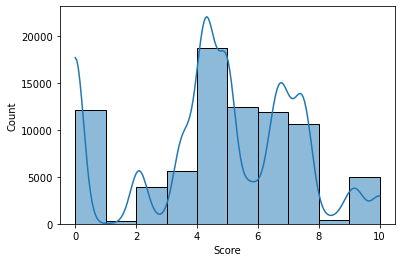

In [35]:
sn.histplot(cve1['Score'],bins=10,kde=True)

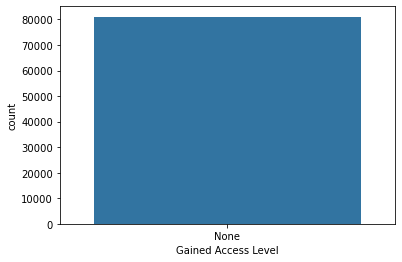

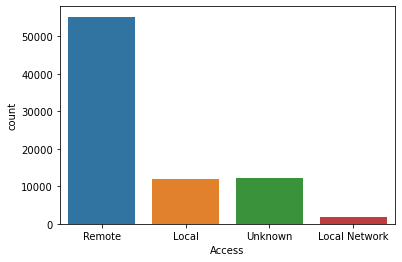

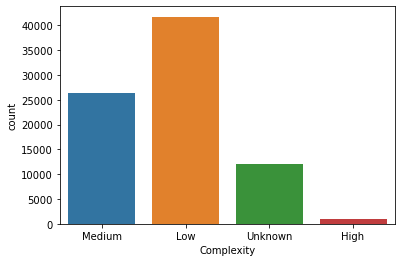

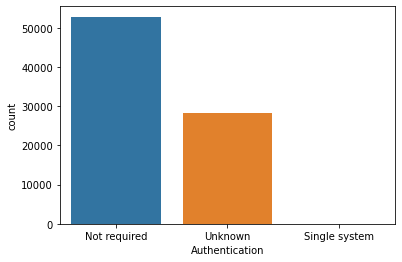

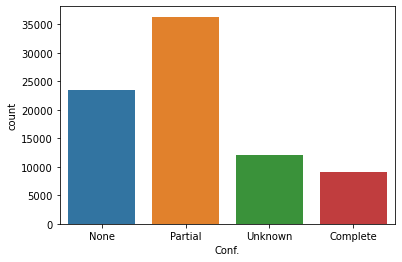

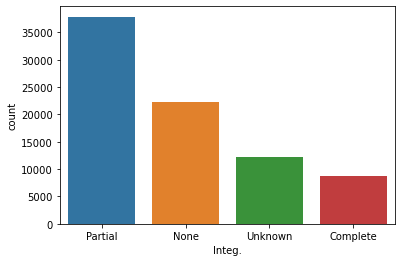

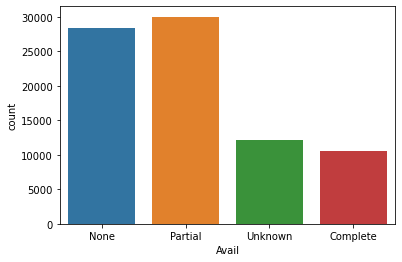

In [36]:
for c in cols:
    sn.countplot(cve1[c])
    plt.show()

In [37]:
cve1.head(50)

,CVE ID,CWE ID,# of Exploits,Vulnerability Type(s),Publish Date,Update Date,Score,Gained Access Level,Access,Complexity,Authentication,Conf.,Integ.,Avail,CVE Summary
0,CVE-2019-1020019,79,0,XSS,2019-07-29,2019-07-31,4.3,None,Remote,Medium,Not required,None,Partial,None,invenio-previewer before 1.0.0a12 allows XSS.
1,CVE-2019-1020018,287,0,Unknown,2019-07-29,2022-04-18,7.5,None,Remote,Low,Not required,Partial,Partial,Partial,Discourse before 2.3.0 and 2.4.x before 2.4.0....
2,CVE-2019-1020017,0,0,Unknown,2019-07-29,2023-03-03,5.0,None,Remote,Low,Not required,None,Partial,None,Discourse before 2.3.0 and 2.4.x before 2.4.0....
3,CVE-2019-1020016,601,0,Unknown,2019-07-29,2019-08-01,5.8,None,Remote,Medium,Not required,Partial,Partial,None,ASH-AIO before 2.0.0.3 allows an open redirect.
4,CVE-2019-1020015,20,0,Unknown,2019-07-29,2021-07-21,5.0,None,Remote,Low,Not required,None,Partial,None,graphql-engine (aka Hasura GraphQL Engine) bef...
5,CVE-2019-1020014,415,0,Unknown,2019-07-29,2022-10-06,2.1,None,Local,Low,Not required,Partial,None,None,docker-credential-helpers before 0.6.3 has a d...
6,CVE-2019-1020013,209,0,Unknown,2019-07-29,2020-08-24,5.0,None,Remote,Low,Not required,Partial,None,None,parse-server before 3.6.0 allows account enume...
7,CVE-2019-1020012,444,0,Unknown,2019-07-29,2019-08-02,5.0,None,Remote,Low,Not required,None,None,Partial,parse-server before 3.4.1 allows DoS after any...
8,CVE-2019-1020011,669,0,Unknown,2019-07-29,2022-04-18,6.5,None,Remote,Low,Unknown,Partial,Partial,Partial,SmokeDetector intentionally does automatic dep...
9,CVE-2019-1020010,79,0,XSS,2019-07-29,2019-09-05,4.3,None,Remote,Medium,Not required,None,Partial,None,Misskey before 10.102.4 allows hijacking a use...
